# Assignment 07 - Unsupervised Learning

## Assignment description

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

## Loads the dataset

In [32]:
import pandas as pd 

df = pd.read_csv('data/agaricus-lepiota.csv')
X = pd.get_dummies(df)
X.head()

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Visualizes the dataset

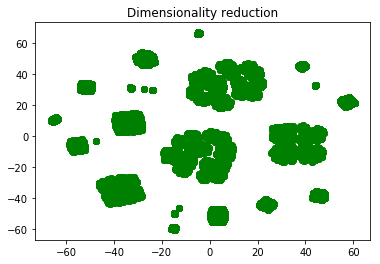

In [33]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

model = TSNE(learning_rate = 100)

transformed = model.fit_transform(X.values)

xs = transformed[:, 0]
ys = transformed[:, 1]

X_trans = pd.DataFrame({'xs': xs, 'ys': ys})

plt.scatter(xs, ys, c= 'green')
plt.title('Dimensionality reduction')

plt.show()

## Determines the optimal number of clusters

### Silhouette coefficient

Simple measure for a hard clustering like k-means. A higher SC means better clusters.

Composed of two scores:
* a - Mean distance between a sample and all other points in the same class
* b - Mean distance between a sample and all other points in the *next nearest* cluster

$sc = \frac{b - a}{max(a, b)}$

In [45]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

sc = []

for k in range(2, 31): 
    
    # Performs the EM-algorithm 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    kmeans.predict(X)
    
    # Prints the silhoutte score
    score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean'); 
    print(f'k = {k}\t sc = {score}')
    
    # Calculates the silhoutte score 
    sc.append(score)

k = 2	 sc = 0.1803249719513766
k = 3	 sc = 0.22832286773950566
k = 4	 sc = 0.23008597066260447
k = 5	 sc = 0.2602123143919128
k = 6	 sc = 0.27714303250943756
k = 7	 sc = 0.28732615786759597
k = 8	 sc = 0.29101507280569666
k = 9	 sc = 0.252143529987897
k = 10	 sc = 0.3052029507938714
k = 11	 sc = 0.20259133748080335
k = 12	 sc = 0.203138953933149
k = 13	 sc = 0.20535732593453718
k = 14	 sc = 0.164383604776577
k = 15	 sc = 0.15897129961871476
k = 16	 sc = 0.1672274317314582
k = 17	 sc = 0.16480989352866782
k = 18	 sc = 0.14658709436014988
k = 19	 sc = 0.18071950252087488
k = 20	 sc = 0.1428988974988902
k = 21	 sc = 0.1485951691944463
k = 22	 sc = 0.18220402784201442
k = 23	 sc = 0.1505118437353115
k = 24	 sc = 0.1463404290334194
k = 25	 sc = 0.1623329196721717
k = 26	 sc = 0.14643528603444458
k = 27	 sc = 0.15029672597328667
k = 28	 sc = 0.15207162405409638
k = 29	 sc = 0.15329122970971304
k = 30	 sc = 0.15639410602311424


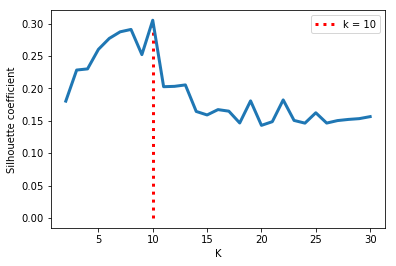

In [47]:
import matplotlib.pyplot as plt

# Plots k vs silhoutte coefficient 
plt.xlabel('K')
plt.ylabel('Silhouette coefficient')
plt.plot(range(2, 31), sc, linewidth=3)

# Finds optimal k 
y_max = max(sc)
x_max = sc.index(y_max) + 2

# Plots the optimal k value 
plt.vlines(x=x_max, ymin=0, ymax=y_max, linewidth=3, linestyle='dotted', color='red', label='k = ' + str(x_max))
plt.legend()

## Visualizes the result 

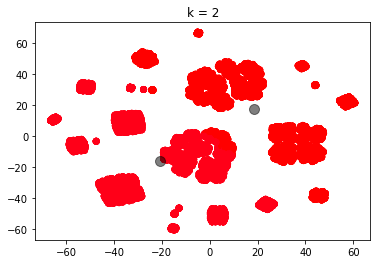

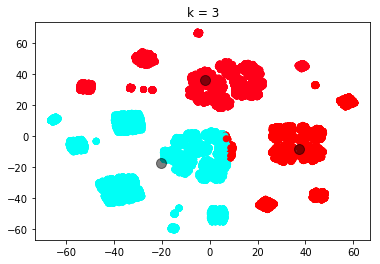

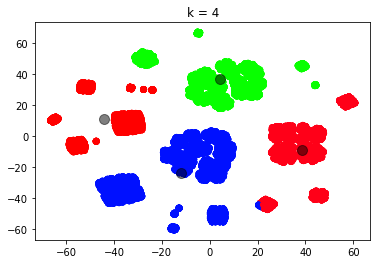

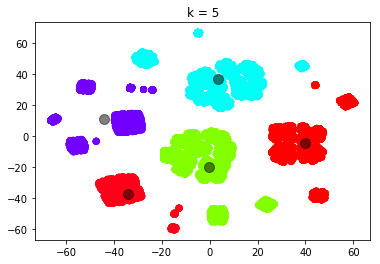

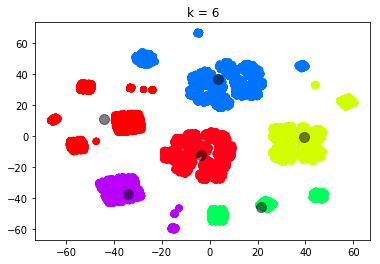

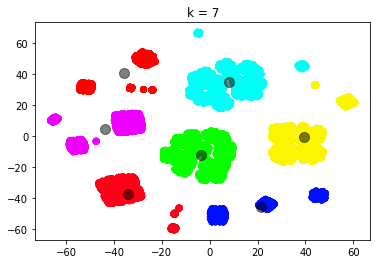

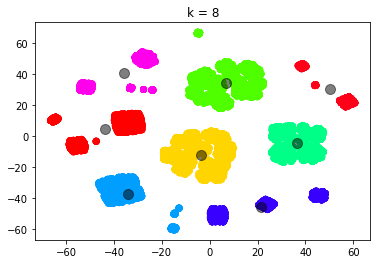

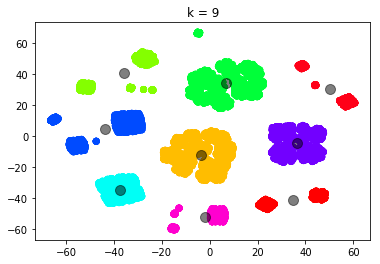

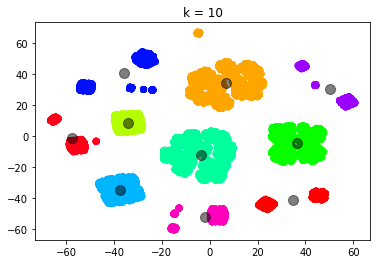

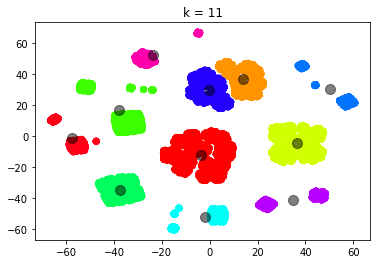

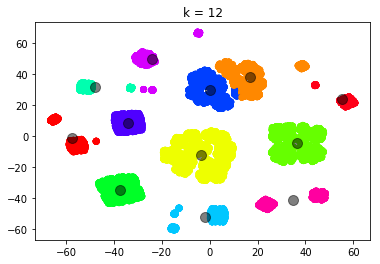

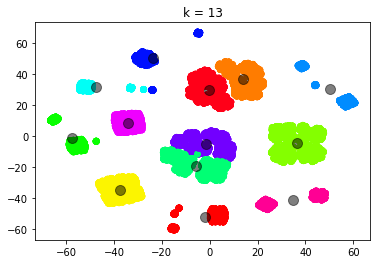

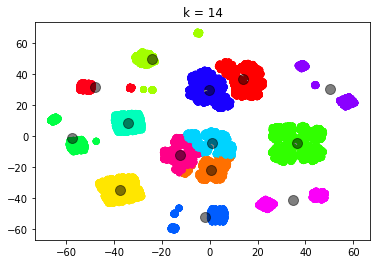

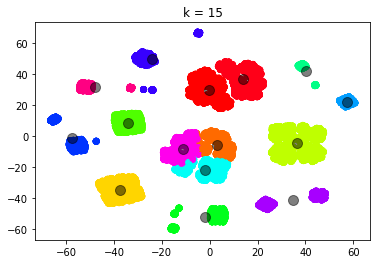

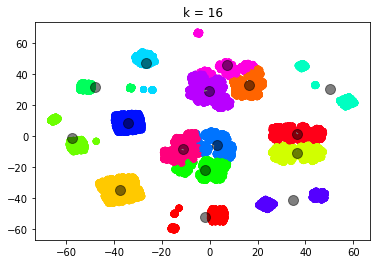

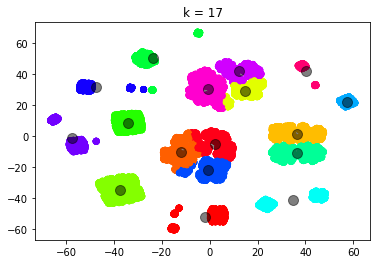

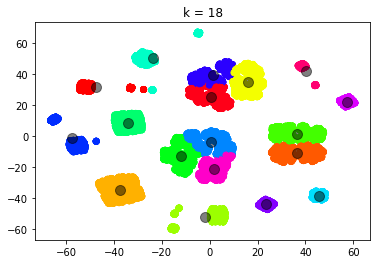

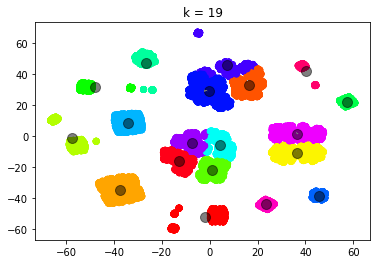

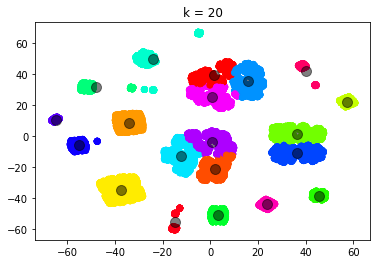

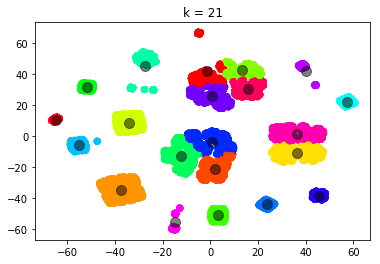

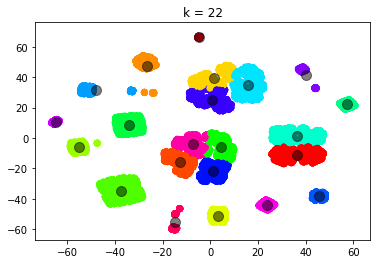

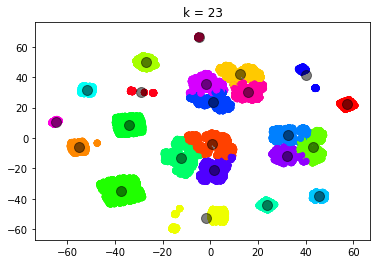

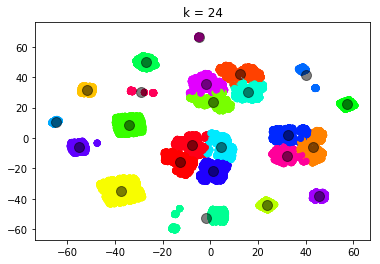

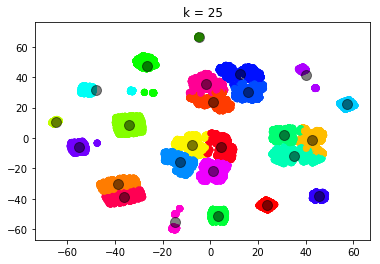

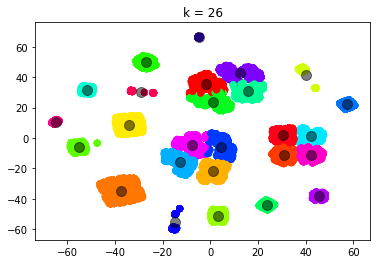

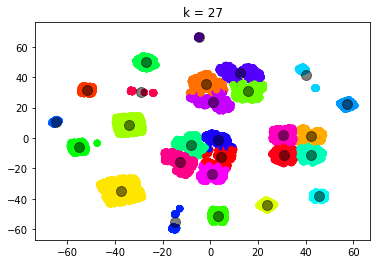

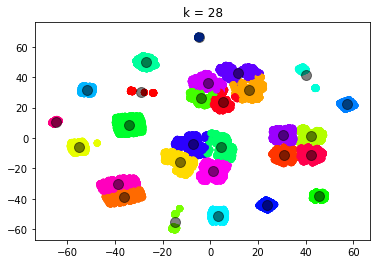

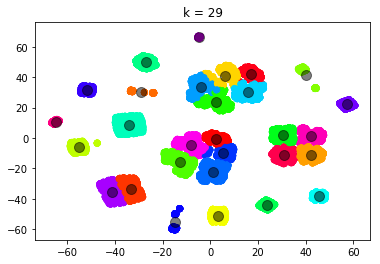

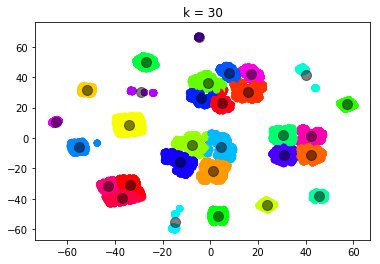

In [46]:
from sklearn.manifold import TSNE

for k in range(2, 31):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X_trans.values)
    y_kmeans = kmeans.predict(X_trans.values)  
    centers = kmeans.cluster_centers_
    
    plt.scatter(xs, ys, c=y_kmeans, cmap='hsv')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
    plt.title('k = %i' %k)
    plt.show()